# Family and Children's Services Crisis Project by DataCampers
### Objective 2: Analyze trends in call content by looking for which issues are most frequent and what is the average count of issues per call.
- *For the second objective, the columns that contain the information about the documented issues are those that begin with CRISIS Issues. When calls come in, call takers use a form to indicate the various issues the individual is experiencing.*
- *If an individual is experiencing multiple issues, the issues can be grouped together into a single cell, which makes understanding individual issues difficult. For this project you will parse the data from the different CRISIS Issues columns to allow deeper investigation of each individual issue.*

#### Read in the relevant data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests as re

In [2]:
df1 = pd.read_excel('../data/NSSCrisisv_1.xlsx') # 2020-2021
df2 = pd.read_excel('../data/NSSCrisisv_2.xlsx') # 2022
# df_2020 = pd.read_excel('../data/2020callcenter.xlsx')
# df_2021 = pd.read_excel('../data/2021callcenter.xlsx')
# df_2022 = pd.read_excel('../data/2022callcenter.xlsx')

#### Make a DataFrame out of the 13 CRISIS Issues columns. Listing column headers here to copy and paste into the code below because these names are long.
- CRISIS Issues - Abusive Behavior
- CRISIS Issues - Call Problems (specify at least 2)
- CRISIS Issues - Emotional State
- CRISIS Issues - Financial/Basic Needs
- CRISIS Issues - Health/Physical
- CRISIS Issues - Homicide
- CRISIS Issues - Information or Services Needed
- CRISIS Issues - Mental Health
- CRISIS Issues - No Issue Call
- CRISIS Issues - Other Description
- CRISIS Issues - Relationships
- CRISIS Issues - Substances
- CRISIS Issues - Suicide

In [5]:
# For df1 (2020-2021)
df1_ci = df1[['CRISIS Issues - Abusive Behavior','CRISIS Issues - Call Problems (specify at least 2)','CRISIS Issues - Emotional State','CRISIS Issues - Financial/Basic Needs','CRISIS Issues - Health/Physical','CRISIS Issues - Homicide','CRISIS Issues - Information or Services Needed','CRISIS Issues - Mental Health','CRISIS Issues - No Issue Call','CRISIS Issues - Other Description','CRISIS Issues - Relationships','CRISIS Issues - Substances','CRISIS Issues - Suicide']]
df1_ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52876 entries, 0 to 52875
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CRISIS Issues - Abusive Behavior                    2046 non-null   object 
 1   CRISIS Issues - Call Problems (specify at least 2)  0 non-null      float64
 2   CRISIS Issues - Emotional State                     35688 non-null  object 
 3   CRISIS Issues - Financial/Basic Needs               2010 non-null   object 
 4   CRISIS Issues - Health/Physical                     4842 non-null   object 
 5   CRISIS Issues - Homicide                            46 non-null     object 
 6   CRISIS Issues - Information or Services Needed      1833 non-null   object 
 7   CRISIS Issues - Mental Health                       18437 non-null  object 
 8   CRISIS Issues - No Issue Call                       1519 non-null   object 


Looks like Emotional State, Relationships, and Mental Health have the most values. I can't find any CRISIS Issues columns in v2.
- Refresher: *If an individual is experiencing multiple issues, the issues can be grouped together into a single cell, which makes understanding individual issues difficult. For this project you will parse the data from the different CRISIS Issues columns to allow deeper investigation of each individual issue.*

#### EDA: Made some SERIES plots (!= df) of the CRISIS Issues columns to identify common issues

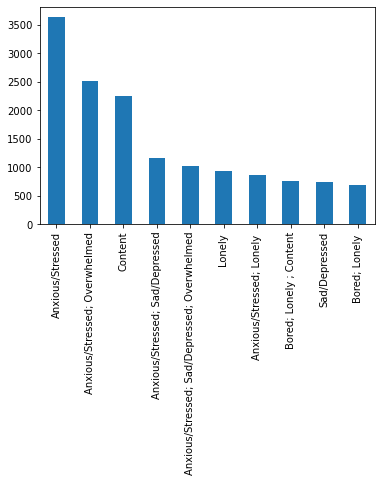

In [33]:
# Emotional State (most values)
df_emostate = df1_ci['CRISIS Issues - Emotional State'].value_counts()[:10].sort_values(ascending=False)
df_emostate.plot.bar();
# Content is 3rd most common!

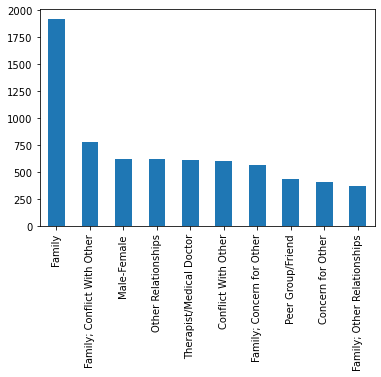

In [39]:
# Relationships (2nd most values)
df_relationships = df1_ci['CRISIS Issues - Relationships'].value_counts()[:10].sort_values(ascending=False)
df_relationships.plot.bar();

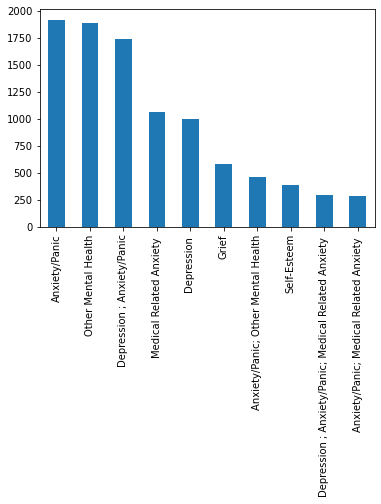

In [38]:
# Mental health (3rd most values)
df_mh = df1_ci['CRISIS Issues - Mental Health'].value_counts()[:10].sort_values(ascending=False)
df_mh.plot.bar();

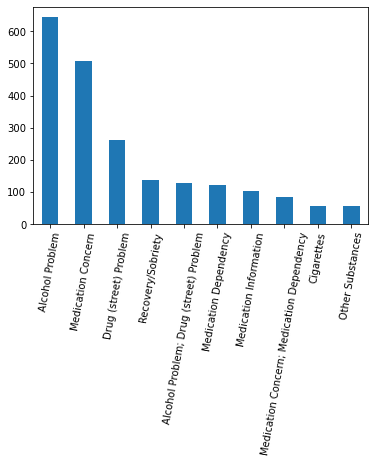

In [45]:
# Substances
df_substances = df1_ci['CRISIS Issues - Substances'].value_counts()[:10].sort_values(ascending=False)
df_substances.plot.bar(rot=80); # testing rotation

In [ ]:
# Abusive Behavior (TW, cleared output)
df_abuse = df1_ci['CRISIS Issues - Abusive Behavior'].value_counts()[:5].sort_values(ascending=False)
df_abuse.plot.bar();

In [ ]:
# Suicide (TW, cleared output)
df_suicide = df1_ci['CRISIS Issues - Suicide'].value_counts()[:5].sort_values(ascending=False)
df_suicide.plot.bar();

Prelim EDA of the CRISIS Issues shows that many callers are anxious or stressed when calling in and also are generally anxious overall in terms of their mental health. Most reported issues with...
- relationships involve family
- substances involve alcohol, medication, street drugs, or a combination of those
- abuse involve family and spouse/partner
- suicide are from a third party concerned about someone else's risk, followed by caller's own risk